# Gráficas, Dijkstra y Floyd

In [32]:
import networkx as nx
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math

In [3]:

def dijkstra(g, ini):
    if(ini not in g): 
        print('nodo no encontrado en la grafica')
        return 0
    
    # crea una nueva grafica para guardar las distancias "pathG"
    pathG = nx.Graph(g);
    
    
    #agrega el atribto de distancia a todos los nodos
    #usa 0 para el nodo de inicio y -1 para infinito
    for n in pathG.nodes:
        if(n == ini): 
            pathG.nodes[n]['dis'] = 0
        else:
            pathG.nodes[n]['dis'] = -1       

    visited = []
    while(set(visited) != set(g.nodes)):
        nextNode = getNext(pathG, visited)
        
        visited.append(nextNode)
        
        updateDist(pathG, nextNode)
    return pathG

"""Metodo auxiliar para encontrar el siguiente nodo a analizar"""
def getNext(g, visited):    
    dists = {u:v['dis'] for u,v in g.nodes.data() if u not in visited and v['dis'] !=-1}
    return min(dists, key=dists.get)

"""Metodo auxiliar para cambiar los valores de las distancias sobre la grafica de distancias"""
def updateDist(g, node):
    distToNode = g.nodes[node]['dis']
    for nbr in g[node]:
        distFromNode = distToNode + g.edges[node, nbr]['weight']
        if(g.nodes[nbr]['dis'] == -1 or g.nodes[nbr]['dis'] > distFromNode):
            g.nodes[nbr]['dis'] = distFromNode      
            
def pintaGraficaDijkstra(g):
    dist = [v['dis'] for u,v in g.nodes.data() ]
    labs = {u:str(u) + ':' + str(v['dis']) for u,v in g.nodes.data() }
    
    #fija la posicion de los nodos
    ps = nx.spring_layout(g)
    #pinta los nodos con sus nombres
    nx.draw(g, pos=ps , node_color = dist, cmap = plt.cm.Blues, node_size = 1000)
    nx.draw_networkx_labels(g, pos = ps, labels=labs)
    
    #crea diccionario de edge:weight para poner el peso sobre las aristas
    ed_labels = { (u,v):w['weight'] for u, v, w in g.edges.data()}
    
    nx.draw_networkx_edge_labels(g, pos=ps, edge_labels=ed_labels)
    
    
def pintaGrafica(g, labs=None):
    #fija la posicion de los nodos
    ps = nx.spring_layout(g)
    #pinta los nodos con sus nombres
    nx.draw(g, pos=ps ,with_labels=True)
    
    #crea diccionario de edge:weight para poner en las aristas el peso
    ed_labels = { (u,v):w['weight'] for u, v, w in g.edges.data()}
    
    nx.draw_networkx_edge_labels(g, pos=ps, edge_labels=ed_labels)
    

def pintaMapa(g, labs=None):
    #fija la posicion de los nodos
    ps = nx.kamada_kawai_layout(g)
    #pinta los nodos con sus nombres
    nx.draw(g, pos=ps ,with_labels=True)
    
    #crea diccionario de edge:weight para poner en las aristas el peso
    ed_labels = { (u,v):w['weight'] for u, v, w in g.edges.data()}
    
    nx.draw_networkx_edge_labels(g, pos=ps, edge_labels=ed_labels)
    


In [4]:
def floyd(g):
    #se crea la matriz de adjacencia desde la libreria de grafica
    mat = np.array([[-1]*len(g.nodes)]*len(g.nodes))
    for i in range(len(g.nodes)):
        mat[i, i] = 0
    iss,js,ws = sp.sparse.find(nx.adjacency_matrix(g))
    for i,j,w in zip(iss,js,ws):
        mat[i,j] = w 
        
    #se corre floyd sobre la matriz
    for k in range(len(g.nodes)):
        for i in range(len(g.nodes)):
            for j in range(len(g.nodes)):
                if(mat[i][k] > 0 and mat[k][j] > 0):
                    if(mat[i, j] == -1):
                        mat[i, j] = mat[i][k] + mat[k][j]
                    else:
                        mat[i, j] = min(mat[i][j], mat[i][k] + mat[k][j])
    return mat


# Pruebas

In [5]:
g = nx.Graph()

In [6]:
g.add_nodes_from((i for i in range (10)))

In [7]:
list(g.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
lisEd = [(9,7),(7,8),(8,6),(6,0),(0,2),(0,1),(1,5),(5,3),(5,10),(3,10),(10,4),(7,0),(7,3)];

In [9]:
for edge in lisEd:
    g.add_edge(edge[0], edge[1], weight = rnd.randint(1,9))

In [10]:
for e in g.edges:
    print(str(e) + str(g[e[0]][e[1]]))

(0, 6){'weight': 2}
(0, 2){'weight': 9}
(0, 1){'weight': 9}
(0, 7){'weight': 6}
(1, 5){'weight': 1}
(3, 5){'weight': 6}
(3, 10){'weight': 9}
(3, 7){'weight': 7}
(4, 10){'weight': 6}
(5, 10){'weight': 8}
(6, 8){'weight': 6}
(7, 9){'weight': 7}
(7, 8){'weight': 4}


In [11]:
list(g.edges.data())
ed_labels = {(u,v):w['weight'] for u, v, w in g.edges.data()}
ed_labels

{(0, 6): 2,
 (0, 2): 9,
 (0, 1): 9,
 (0, 7): 6,
 (1, 5): 1,
 (3, 5): 6,
 (3, 10): 9,
 (3, 7): 7,
 (4, 10): 6,
 (5, 10): 8,
 (6, 8): 6,
 (7, 9): 7,
 (7, 8): 4}

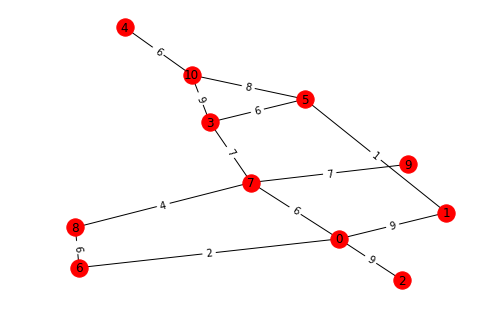

In [12]:
pintaGrafica(g)

In [13]:
pathD = dijkstra(g,0)
matFloyd = floyd(g)
matFloyd[0]

array([ 0,  9,  9, 13, 24, 10,  2,  6,  8, 13, 18])

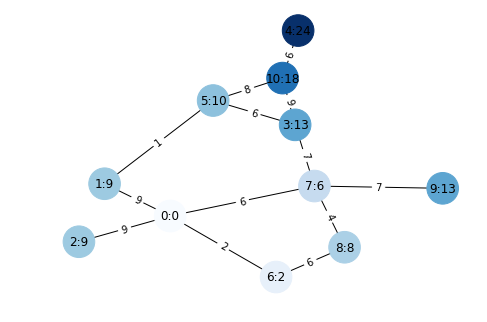

In [47]:
pintaGraficaDijkstra(pathD)

In [25]:
%run map_info.ipynb


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
done


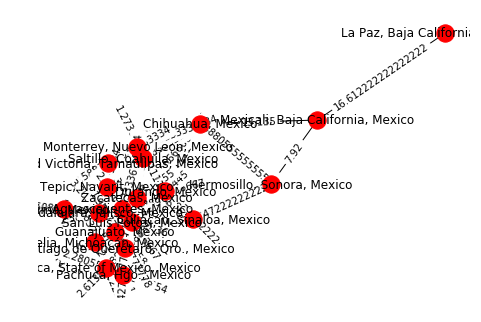

In [26]:
pintaMapa(gMap)

In [43]:
%time
fl=floyd(gMap)
fl

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


array([[ 0, 16,  7, 13, 15, 20, 22, 20, 21, 20, 24, 24, 22, 23, 25, 25,
        27, 25, 26, 27],
       [16,  0, 23, 29, 31, 36, 38, 36, 37, 36, 40, 40, 38, 39, 41, 41,
        43, 41, 42, 43],
       [ 7, 23,  0,  9,  8, 13, 16, 16, 17, 13, 20, 18, 15, 17, 18, 18,
        20, 18, 19, 20],
       [13, 29,  9,  0, 12,  7,  9,  7,  8, 12, 11, 11, 12, 10, 15, 14,
        15, 12, 13, 15],
       [15, 31,  8, 12,  0,  5,  8, 10, 11,  5, 13, 10,  7,  9, 10, 10,
        12, 10, 11, 12],
       [20, 36, 13,  7,  5,  0,  3,  5,  6,  5,  8,  5,  6,  4,  9,  8,
         9,  6,  7,  9],
       [22, 38, 16,  9,  8,  3,  0,  4,  5,  5,  6,  3,  3,  1,  6,  5,
         6,  3,  4,  6],
       [20, 36, 16,  7, 10,  5,  4,  0,  1,  9,  4,  4,  7,  5, 10,  8,
         8,  6,  6,  8],
       [21, 37, 17,  8, 11,  6,  5,  1,  0, 10,  3,  5,  8,  6, 11,  9,
         9,  7,  7,  9],
       [20, 36, 13, 12,  5,  5,  5,  9, 10,  0,  8,  5,  2,  4,  5,  5,
         7,  5,  6,  7],
       [24, 40, 20, 11, 13,  8

In [46]:
for node,i in zip(gMap.nodes, range(len(gMap.nodes))):
    print([math.floor(v['dis']) for u,v in dijkstra(gMap, node).nodes.data() ])

[0, 16, 7, 13, 16, 20, 22, 20, 21, 21, 25, 25, 24, 23, 27, 27, 29, 26, 28, 30]
[16, 0, 24, 29, 32, 37, 38, 37, 38, 38, 42, 42, 40, 40, 44, 44, 46, 42, 44, 46]
[7, 24, 0, 9, 8, 13, 17, 17, 18, 13, 22, 19, 16, 18, 19, 19, 21, 19, 21, 22]
[13, 29, 9, 0, 12, 7, 9, 7, 8, 13, 12, 12, 13, 10, 16, 15, 17, 12, 14, 17]
[16, 32, 8, 12, 0, 5, 8, 10, 11, 5, 14, 10, 8, 10, 11, 11, 13, 11, 13, 13]
[20, 37, 13, 7, 5, 0, 3, 5, 6, 5, 9, 5, 7, 5, 11, 9, 10, 7, 7, 10]
[22, 38, 17, 9, 8, 3, 0, 4, 5, 6, 7, 4, 4, 1, 7, 6, 8, 3, 5, 8]
[20, 37, 17, 7, 10, 5, 4, 0, 1, 10, 4, 4, 8, 5, 11, 9, 9, 7, 7, 9]
[21, 38, 18, 8, 11, 6, 5, 1, 0, 11, 3, 5, 9, 7, 13, 10, 10, 8, 8, 10]
[21, 38, 13, 13, 5, 5, 6, 10, 11, 0, 10, 6, 2, 5, 6, 5, 7, 5, 7, 8]
[25, 42, 22, 12, 14, 9, 7, 4, 3, 10, 0, 3, 7, 6, 11, 8, 8, 6, 6, 8]
[25, 42, 19, 12, 10, 5, 4, 4, 5, 6, 3, 0, 3, 2, 7, 4, 5, 2, 2, 4]
[24, 40, 16, 13, 8, 7, 4, 8, 9, 2, 7, 3, 0, 2, 3, 3, 5, 3, 5, 5]
[23, 40, 18, 10, 10, 5, 1, 5, 7, 5, 6, 2, 2, 0, 6, 4, 6, 2, 4, 6]
[27, 44, 19, 

In [35]:
list(gMap.edges.data())

[('Mexicali, Baja California, Mexico',
  'La Paz, Baja California Sur, Mexico',
  {'weight': 16.612222222222222}),
 ('Mexicali, Baja California, Mexico',
  'Hermosillo, Sonora, Mexico',
  {'weight': 7.92}),
 ('Mexicali, Baja California, Mexico',
  'Chihuahua, Mexico',
  {'weight': 13.135}),
 ('Hermosillo, Sonora, Mexico',
  'Chihuahua, Mexico',
  {'weight': 9.888055555555555}),
 ('Hermosillo, Sonora, Mexico',
  'Culiacán, Sinaloa, Mexico',
  {'weight': 8.384722222222223}),
 ('Chihuahua, Mexico', 'Durango, Mexico', {'weight': 7.443611111111111}),
 ('Chihuahua, Mexico', 'Zacatecas, Mexico', {'weight': 9.121666666666666}),
 ('Chihuahua, Mexico',
  'Saltillo, Coahuila, Mexico',
  {'weight': 7.795833333333333}),
 ('Chihuahua, Mexico',
  'Monterrey, Nuevo Leon, Mexico',
  {'weight': 8.788333333333334}),
 ('Culiacán, Sinaloa, Mexico',
  'Durango, Mexico',
  {'weight': 5.429722222222222}),
 ('Culiacán, Sinaloa, Mexico',
  'Tepic, Nayarit, Mexico',
  {'weight': 5.398333333333333}),
 ('Durango, 

In [39]:
list(gMap.nodes)

['Mexicali, Baja California, Mexico',
 'La Paz, Baja California Sur, Mexico',
 'Hermosillo, Sonora, Mexico',
 'Chihuahua, Mexico',
 'Culiacán, Sinaloa, Mexico',
 'Durango, Mexico',
 'Zacatecas, Mexico',
 'Saltillo, Coahuila, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Tepic, Nayarit, Mexico',
 'Ciudad Victoria, Tamaulipas, Mexico',
 'San Luis Potosi, Mexico',
 'Guadalajara, Jalisco, Mexico',
 'Aguascalientes, Mexico',
 'Colima, Mexico',
 'Morelia, Michoacán, Mexico',
 'Toluca, State of Mexico, Mexico',
 'Guanajuato, Mexico',
 'Santiago de Querétaro, Qro., Mexico',
 'Pachuca, Hgo., Mexico']

In [45]:
%time
for node,i in zip(gMap.nodes, range(len(gMap.nodes))):
    print(fl[i] - [v['dis'] for u,v in dijkstra(gMap, node).nodes.data() ])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.54 µs
[ 0.         -0.61222222 -0.92       -0.135      -1.30472222 -0.57861111
 -0.25666667 -0.93083333 -0.92333333 -1.70305556 -1.51166667 -1.79
 -2.35138889 -0.94222222 -2.85944444 -2.40638889 -2.42972222 -1.10555556
 -2.07333333 -3.1125    ]
[-0.61222222  0.         -1.53222222 -0.74722222 -1.91694444 -1.19083333
 -0.86888889 -1.54305556 -1.53555556 -2.31527778 -2.12388889 -2.40222222
 -2.96361111 -1.55444444 -3.47166667 -3.01861111 -3.04194444 -1.71777778
 -2.68555556 -3.72472222]
[-0.92       -1.53222222  0.         -0.88805556 -0.38472222 -0.81444444
 -1.16111111 -1.68388889 -1.67638889 -0.78305556 -2.26472222 -1.33388889
 -1.43138889 -1.84666667 -1.93944444 -1.48638889 -1.50972222 -1.69694444
 -2.66472222 -2.1925    ]
[-0.135      -0.74722222 -0.88805556  0.         -0.87333333 -0.44361111
 -0.12166667 -0.79583333 -0.78833333 -1.07194444 -1.37666667 -1.655
 -1.39611111 -0.80722222 -1.90416667 -1.26361111 -2.55222222 -